In [5]:
import os
import cv2
import glob
import h5py
from scipy.io import loadmat
import numpy as np
from tqdm import tqdm
from utils import get_density_map_gaussian
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
%matplotlib inline


with_direction = False

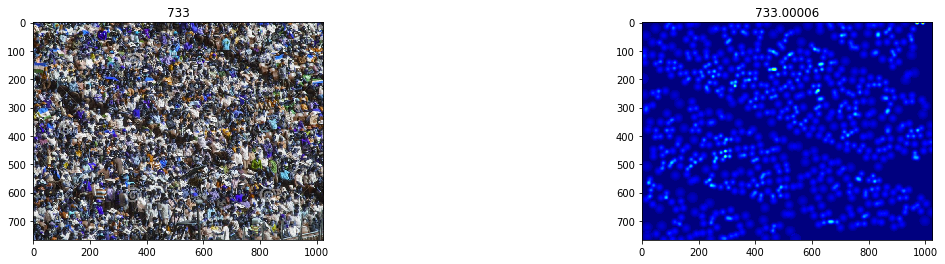

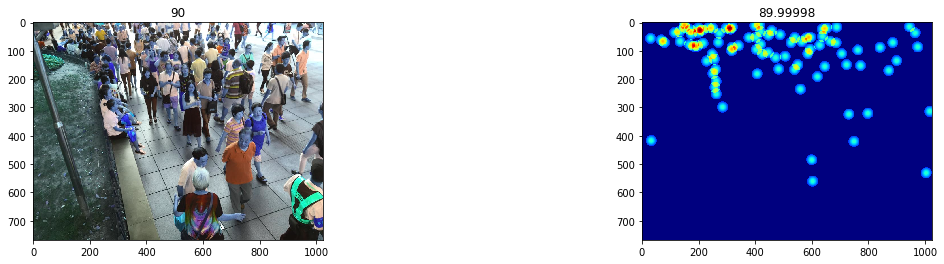

In [17]:
# Show a sample
img_paths = ['part_A/train_data/images/IMG_108.jpg',
             'part_B/train_data/images/IMG_20.jpg']
from utils import load_img
is_adaptive = False
for img_path in img_paths:
    is_adaptive = not is_adaptive
    img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    pts = loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_'))
    img = cv2.imread(img_path)

    k = np.zeros((img.shape[0], img.shape[1]))

    gt = pts["image_info"][0, 0][0, 0][0]

    for i in range(len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1

    k = get_density_map_gaussian(k, gt, adaptive_mode=is_adaptive)

    fg, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 4))
    ax0.imshow(img)
    ax0.set_title(str(gt.shape[0]))
    ax1.imshow(k, cmap=plt.cm.jet)
    ax1.set_title(str(np.sum(k)))
    plt.show()

In [7]:
img_ori.shape

(768, 1024, 3)

In [57]:
img_ori.shape

(768, 1024, 3)

In [37]:
k.shape

(768, 1024)

In [53]:
import tensorflow as tf
from tensorflow import keras

pre_model = tf.keras.applications.VGG16(include_top=False, input_shape=(64, 64, 3), pooling='avg')
pre_model.trainable = False
# pre_model.summary()
model = tf.keras.Sequential([
           pre_model,
           tf.keras.layers.Conv2D(128, kernel_size=1, activation='relu')
       ])

ValueError: Input 0 of layer conv2d_28 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 512]

In [1]:
from data import CrowdDataSet 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds = CrowdDataSet('part_A/train_data/')

In [6]:
x = ds[10]

x['image'].shape

IMG_108.jpg


(767, 1024, 3)

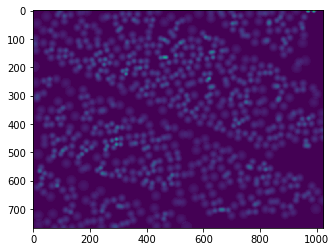

733.00006

In [4]:
plt.imshow(x['den'])
plt.show()

np.sum(x['den'])

In [5]:
from data import CrowdDataSet 
from data import default_train_transforms

loaders = {
    "train": CrowdDataSet(
        'part_A/train_data', default_train_transforms(output_size=224, factor=1)
    ),
    "val": CrowdDataSet(
        'part_A/test_data', default_train_transforms(output_size=224, factor=1)
    )
}

In [6]:
from models import VGG16Transfer
from trainer import train
import torch.optim as optim
import torch.nn as nn

# Model
model = VGG16Transfer(scale_factor=32) 
# Loss
criterion = nn.MSELoss()
# Optimizer
lr = 1e-5
optimizer = optim.Adam(model.parameters(), lr=lr)

# Train
train(model, loaders['train'], criterion, optimizer, 20)

IMG_1.jpg


RuntimeError: Expected 4-dimensional input for 4-dimensional weight [64, 3, 3, 3], but got 3-dimensional input of size [768, 1024, 3] instead